# **Installing and Importing needed Libraries while setting up the data path**

In [84]:
import os
data_folder_path = r"C:\Users\kalil\OneDrive\Bureau\FER13"
os.chdir(data_folder_path)
current_directory = os.getcwd()
print("Current working directory:", current_directory)
#!pip install -r requirements.txt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display, Javascript
from base64 import b64decode
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from keras import models, layers, optimizers, utils, losses
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.models import save_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2  # OpenCV library for image processing
from flask import Flask, request

import imgcompare

Current working directory: C:\Users\kalil\OneDrive\Bureau\FER13


# **Unzipping the Training/Test data**


In [3]:
"""
file_name = "archive.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

"""

'\nfile_name = "archive.zip"\nwith ZipFile(file_name, \'r\') as zip:\n  zip.extractall()\n  print("Done")\n\n'

# **Preparing the Train/Validation data**


In [31]:
train_dir = 'train'
val_dir = 'test'

train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')




Found 28710 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# **Data Augmentation**


In [32]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
     fill_mode = 'nearest',
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# **----------------------------------------------------------------------------------------------**

# **----------------------------------------------------------------------------------------------**

# **Custom Convolutional Neural Network Construction and compile**


In [28]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(BatchNormalization())
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(512, activation='relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
emotion_model.summary()

# Compile the model
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


# Configure Model Checkpoint
fle_s='./Models/emotion_model_Custom.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_25 (Bat  (None, 46, 46, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_26 (Bat  (None, 44, 44, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                      

# **Training the Model**

In [37]:
callback_list=[checkpointer]

# Train the model
history = emotion_model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator)/8
    ,epochs=20,shuffle=True,callbacks=[callback_list],
    validation_data=validation_generator,
    validation_steps=len(validation_generator)/64
)



Epoch 1/20


C:\Users\kalil\AppData\Local\Temp\ipykernel_21184\1960681074.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = emotion_model.fit_generator(


57/56 [==============================] - ETA: 0s - loss: 1.5601 - accuracy: 0.4328
Epoch 1: loss improved from 1.59859 to 1.56014, saving model to ./Models\emotion_model_Custom.h5
56/56 [==============================] - 14s 253ms/step - loss: 1.5601 - accuracy: 0.4328 - val_loss: 2.0947 - val_accuracy: 0.2422
Epoch 2/20
57/56 [==============================] - ETA: 0s - loss: 1.5332 - accuracy: 0.4485
Epoch 2: loss improved from 1.56014 to 1.53315, saving model to ./Models\emotion_model_Custom.h5
56/56 [==============================] - 14s 255ms/step - loss: 1.5332 - accuracy: 0.4485 - val_loss: 1.8848 - val_accuracy: 0.3516
Epoch 3/20
57/56 [==============================] - ETA: 0s - loss: 1.4549 - accuracy: 0.4740
Epoch 3: loss improved from 1.53315 to 1.45493, saving model to ./Models\emotion_model_Custom.h5
56/56 [==============================] - 16s 290ms/step - loss: 1.4549 - accuracy: 0.4740 - val_loss: 1.7696 - val_accuracy: 0.3672
Epoch 4/20
57/56 [========================

# **Model Evaluation**

In [39]:

test_generator = val_datagen.flow_from_directory(
    'test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)

y_pred = emotion_model.predict(test_generator)

y_true = test_generator.classes

y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Found 7178 images belonging to 7 classes.
113/113 [==============================] - 6s 54ms/step
Test Accuracy: 53.71%


# **Training VS Validation Accuracy**

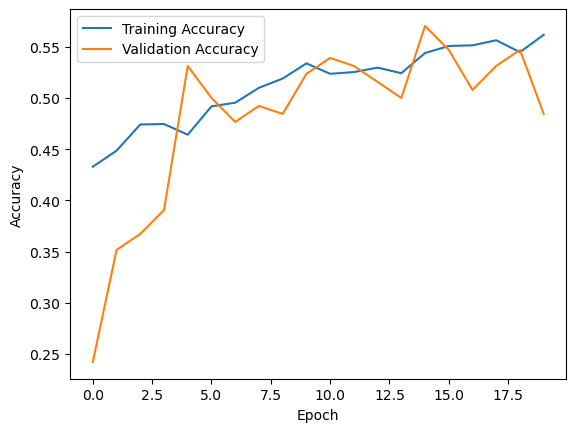

In [40]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Confusion Matrix**

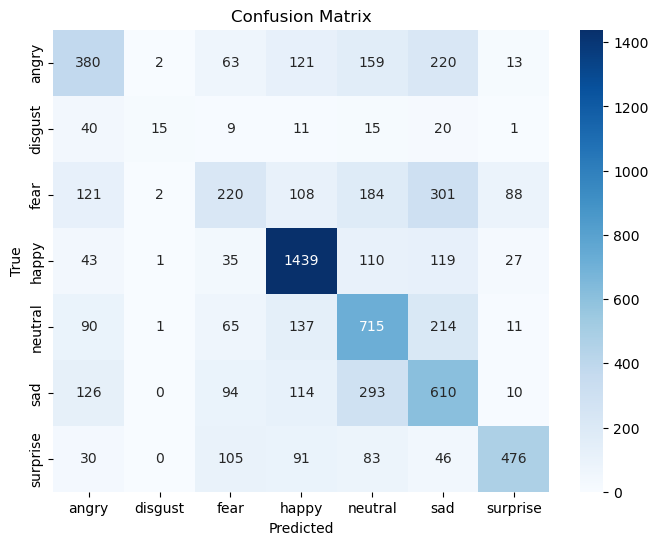

In [41]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Classification Report**

In [42]:
class_report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

       angry       0.46      0.40      0.43       958
     disgust       0.71      0.14      0.23       111
        fear       0.37      0.21      0.27      1024
       happy       0.71      0.81      0.76      1774
     neutral       0.46      0.58      0.51      1233
         sad       0.40      0.49      0.44      1247
    surprise       0.76      0.57      0.65       831

    accuracy                           0.54      7178
   macro avg       0.55      0.46      0.47      7178
weighted avg       0.54      0.54      0.53      7178



# **ROC Curves**

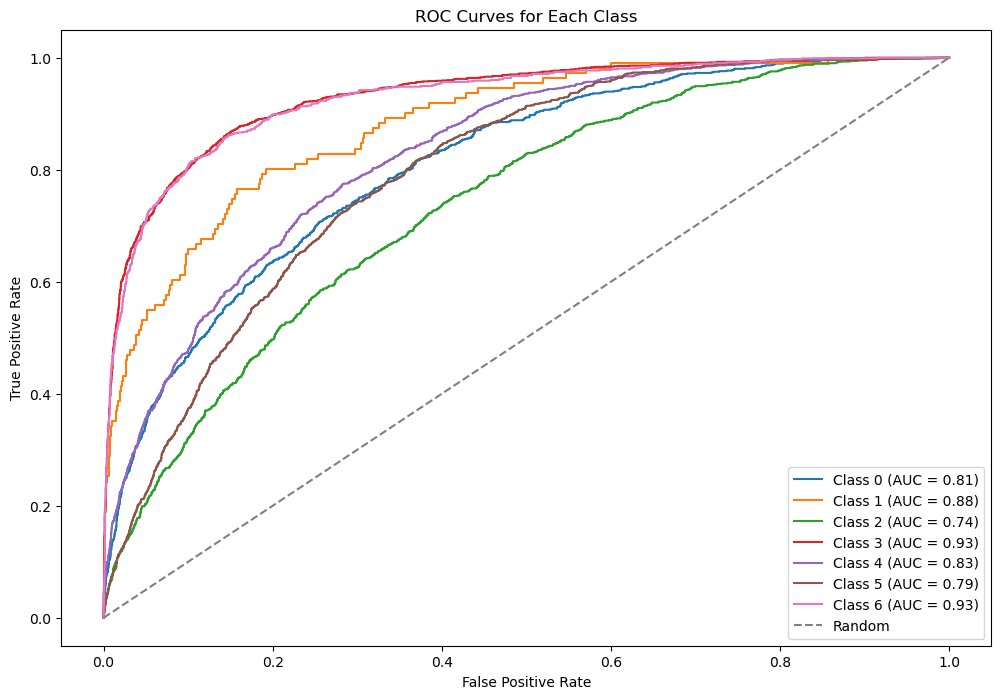

In [43]:
plt.figure(figsize=(12, 8))
for i in range(len(train_generator.class_indices)):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()

# **----------------------------------------------------------------------------------------------**

# **----------------------------------------------------------------------------------------------**

# **VGG16 Convolutional Neural Network Construction and compile**


In [58]:
emotion_modelVGG16= Sequential()

# Block 1
emotion_modelVGG16.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
emotion_modelVGG16.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
emotion_modelVGG16.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
emotion_modelVGG16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
emotion_modelVGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
emotion_modelVGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
emotion_modelVGG16.add(MaxPooling2D((2, 2), strides=(2, 2)))

emotion_modelVGG16.add(Flatten())
emotion_modelVGG16.add(Dense(4096, activation='relu'))
emotion_modelVGG16.add(Dropout(0.5))
emotion_modelVGG16.add(Dense(4096, activation='relu'))
emotion_modelVGG16.add(Dropout(0.5))
emotion_modelVGG16.add(Dense(7, activation='softmax'))
emotion_modelVGG16.summary()

# Compile the model
emotion_modelVGG16.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


# Configure Model Checkpoint
fle_s='./Models/emotion_modelVGG16.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False,save_freq='epoch')



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 conv2d_51 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 conv2d_53 (Conv2D)          (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                 

# **Training the Model**

In [59]:
callback_list=[checkpointer]


historyVGG16 = emotion_modelVGG16.fit(
        train_generator,
    steps_per_epoch=len(train_generator)/16,
    batch_size=128,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)/16,
epochs=20,
    shuffle=True,
    callbacks=[callback_list])


Epoch 1/20
29/28 [===============================] - ETA: -1s - loss: 2.3902 - accuracy: 0.2031
Epoch 1: loss improved from inf to 2.39020, saving model to ./Models\emotion_modelVGG16.h5
28/28 [==============================] - 63s 2s/step - loss: 2.3902 - accuracy: 0.2031 - val_loss: 1.8370 - val_accuracy: 0.2363
Epoch 2/20
29/28 [===============================] - ETA: -1s - loss: 1.8294 - accuracy: 0.2290
Epoch 2: loss improved from 2.39020 to 1.82939, saving model to ./Models\emotion_modelVGG16.h5
28/28 [==============================] - 63s 2s/step - loss: 1.8294 - accuracy: 0.2290 - val_loss: 1.8434 - val_accuracy: 0.2344
Epoch 3/20
29/28 [===============================] - ETA: -1s - loss: 1.8206 - accuracy: 0.2328
Epoch 3: loss improved from 1.82939 to 1.82059, saving model to ./Models\emotion_modelVGG16.h5
28/28 [==============================] - 62s 2s/step - loss: 1.8206 - accuracy: 0.2328 - val_loss: 1.8200 - val_accuracy: 0.2383
Epoch 4/20
29/28 [==========================

# **Model Evaluation**

In [60]:

test_generator = val_datagen.flow_from_directory(
    'test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)

y_pred = emotion_modelVGG16.predict(test_generator)

y_true = test_generator.classes

y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Found 7178 images belonging to 7 classes.
113/113 [==============================] - 26s 229ms/step
Test Accuracy: 24.71%


# **Training VS Validation Accuracy**

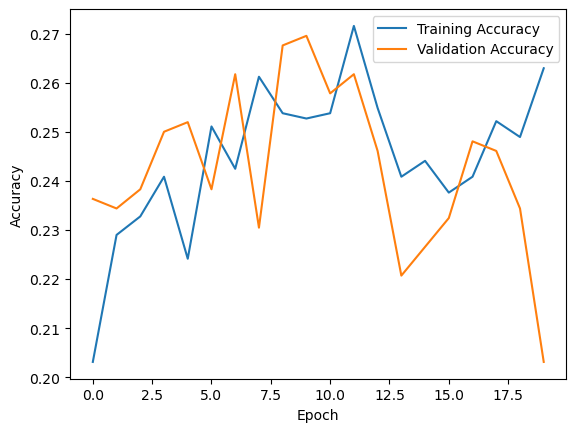

In [61]:

plt.plot(historyVGG16.history['accuracy'], label='Training Accuracy')
plt.plot(historyVGG16.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Confusion Matrix**

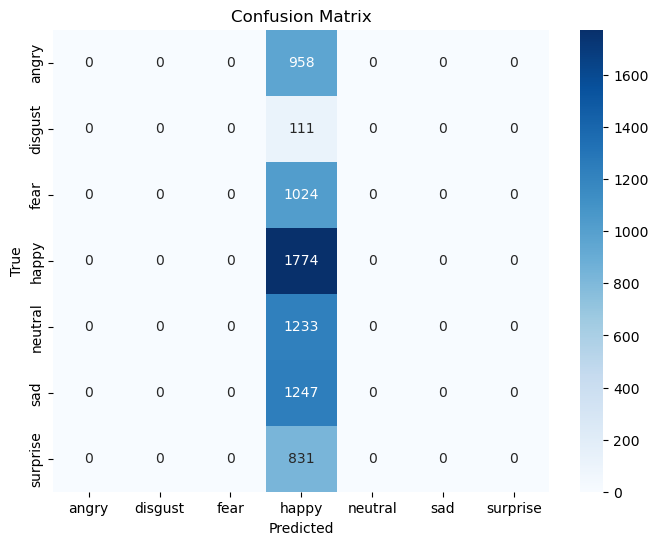

In [62]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Classification Report**

In [63]:
class_report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00       958
     disgust       0.00      0.00      0.00       111
        fear       0.00      0.00      0.00      1024
       happy       0.25      1.00      0.40      1774
     neutral       0.00      0.00      0.00      1233
         sad       0.00      0.00      0.00      1247
    surprise       0.00      0.00      0.00       831

    accuracy                           0.25      7178
   macro avg       0.04      0.14      0.06      7178
weighted avg       0.06      0.25      0.10      7178



C:\Users\kalil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kalil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kalil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **ROC Curves**

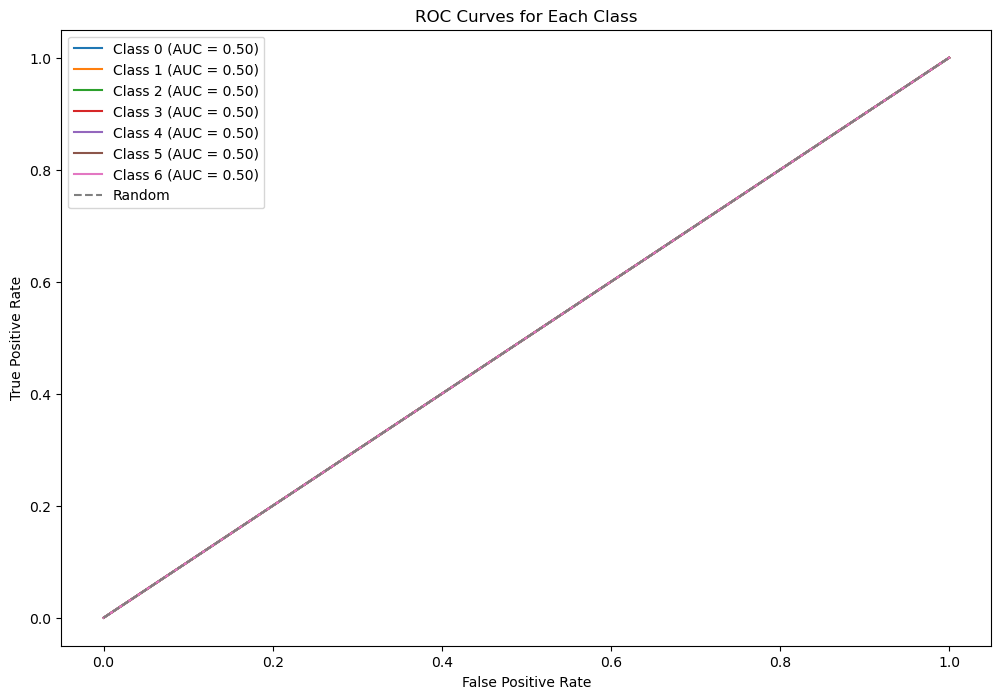

In [64]:
plt.figure(figsize=(12, 8))
for i in range(len(train_generator.class_indices)):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()

# **----------------------------------------------------------------------------------------------**

# **----------------------------------------------------------------------------------------------**

# **GoogleNet Convolutional Neural Network Construction and compile**


In [68]:
emotion_modelVGG16= Sequential()

# Build the model
emotion_model_Googlenet = Sequential()

# Convolutional Block 1
emotion_model_Googlenet.add(Conv2D(32, (3, 3), padding='same', input_shape=(48, 48, 1)))
emotion_model_Googlenet.add(BatchNormalization())
emotion_model_Googlenet.add(Activation('relu'))
emotion_model_Googlenet.add(Conv2D(32, (3, 3), padding='same'))
emotion_model_Googlenet.add(BatchNormalization())
emotion_model_Googlenet.add(Activation('relu'))
emotion_model_Googlenet.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 2
emotion_model_Googlenet.add(Conv2D(64, (3, 3), padding='same'))
emotion_model_Googlenet.add(BatchNormalization())
emotion_model_Googlenet.add(Activation('relu'))
emotion_model_Googlenet.add(Conv2D(64, (3, 3), padding='same'))
emotion_model_Googlenet.add(BatchNormalization())
emotion_model_Googlenet.add(Activation('relu'))
emotion_model_Googlenet.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 3
emotion_model_Googlenet.add(Conv2D(128, (3, 3), padding='same'))
emotion_model_Googlenet.add(BatchNormalization())
emotion_model_Googlenet.add(Activation('relu'))
emotion_model_Googlenet.add(Conv2D(128, (3, 3), padding='same'))
emotion_model_Googlenet.add(BatchNormalization())
emotion_model_Googlenet.add(Activation('relu'))
emotion_model_Googlenet.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
emotion_model_Googlenet.add(Flatten())
emotion_model_Googlenet.add(Dense(512))
emotion_model_Googlenet.add(BatchNormalization())
emotion_model_Googlenet.add(Activation('relu'))
emotion_model_Googlenet.add(Dropout(0.5))
emotion_model_Googlenet.add(Dense(7, activation='softmax'))
emotion_model_Googlenet.summary()

# Compile the model
emotion_model_Googlenet.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


# Configure Model Checkpoint
fle_s='./Models/emotion_model_Googlenet.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')



Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_44 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 activation_14 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 conv2d_76 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_45 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 48, 48, 32)      

# **Training the Model**

In [69]:
callback_list=[checkpointer]


historyGooglenet = emotion_model_Googlenet.fit(
        train_generator,
    steps_per_epoch=len(train_generator)/16,
    batch_size=128,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)/16,
epochs=20,
    shuffle=True,
    callbacks=[callback_list])


Epoch 1/20
29/28 [===============================] - ETA: 0s - loss: 2.2835 - accuracy: 0.2536
Epoch 1: loss improved from inf to 2.28348, saving model to ./Models\emotion_model_Googlenet.h5
28/28 [==============================] - 9s 313ms/step - loss: 2.2835 - accuracy: 0.2536 - val_loss: 1.8238 - val_accuracy: 0.1699
Epoch 2/20
29/28 [===============================] - ETA: 0s - loss: 1.9428 - accuracy: 0.2893
Epoch 2: loss improved from 2.28348 to 1.94283, saving model to ./Models\emotion_model_Googlenet.h5
28/28 [==============================] - 10s 347ms/step - loss: 1.9428 - accuracy: 0.2893 - val_loss: 1.8505 - val_accuracy: 0.1895
Epoch 3/20
29/28 [===============================] - ETA: 0s - loss: 1.8772 - accuracy: 0.3260
Epoch 3: loss improved from 1.94283 to 1.87717, saving model to ./Models\emotion_model_Googlenet.h5
28/28 [==============================] - 10s 345ms/step - loss: 1.8772 - accuracy: 0.3260 - val_loss: 1.9770 - val_accuracy: 0.1816
Epoch 4/20
29/28 [======

# **Model Evaluation**

In [70]:

test_generator = val_datagen.flow_from_directory(
    'test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)

y_pred = emotion_model_Googlenet.predict(test_generator)

y_true = test_generator.classes

y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Found 7178 images belonging to 7 classes.
113/113 [==============================] - 8s 65ms/step
Test Accuracy: 48.96%


# **Training VS Validation Accuracy**

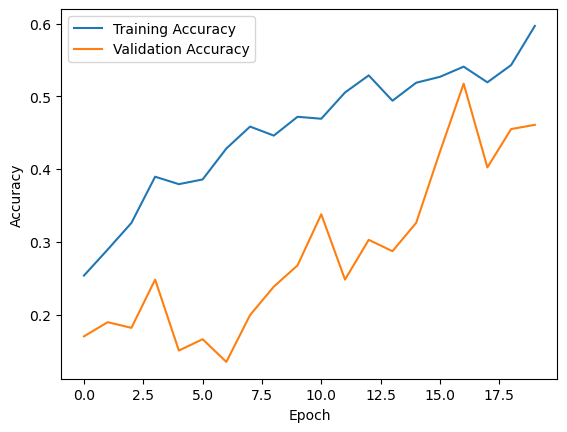

In [71]:

plt.plot(historyGooglenet.history['accuracy'], label='Training Accuracy')
plt.plot(historyGooglenet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Confusion Matrix**

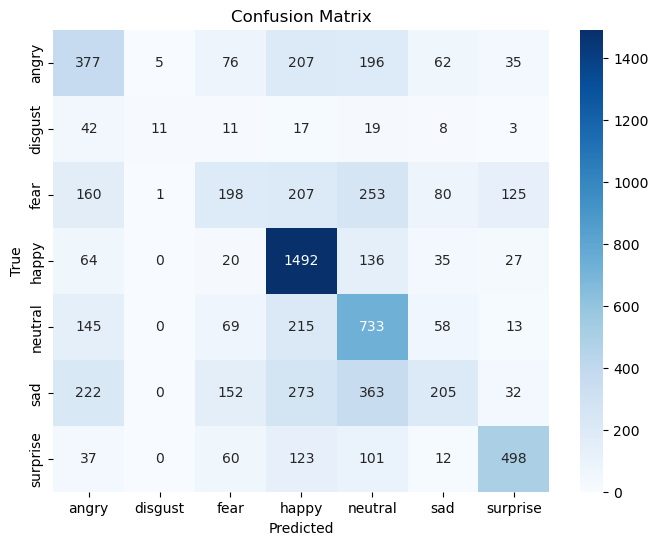

In [72]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Classification Report**

In [73]:
class_report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

       angry       0.36      0.39      0.38       958
     disgust       0.65      0.10      0.17       111
        fear       0.34      0.19      0.25      1024
       happy       0.59      0.84      0.69      1774
     neutral       0.41      0.59      0.48      1233
         sad       0.45      0.16      0.24      1247
    surprise       0.68      0.60      0.64       831

    accuracy                           0.49      7178
   macro avg       0.50      0.41      0.41      7178
weighted avg       0.48      0.49      0.46      7178



# **ROC Curves**

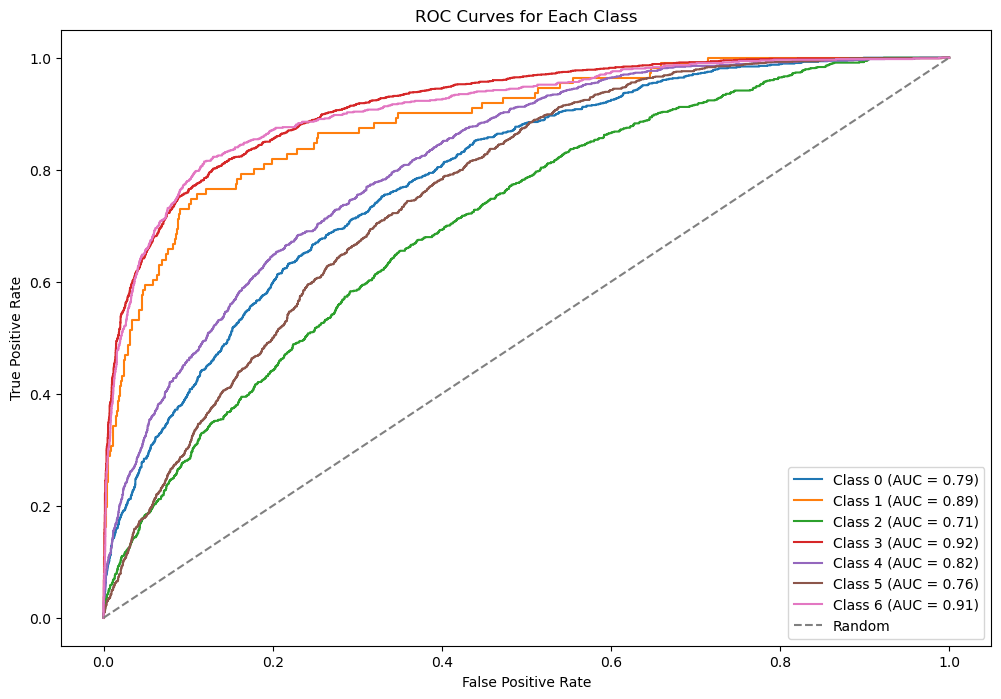

In [74]:
plt.figure(figsize=(12, 8))
for i in range(len(train_generator.class_indices)):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()

# **----------------------------------------------------------------------------------------------**

# **----------------------------------------------------------------------------------------------**

# **GoogleNet Convolutional Neural Network Construction and compile**


In [76]:
emotion_modelVGG16= Sequential()

def resnet_block(x, filters, kernel_size=(3,3), stride=(1,1), conv_first=True):
    if conv_first:
        x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
    else:
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    return x

input_shape = (48, 48, 1)
num_classes = 7

input_tensor = Input(shape=input_shape)

# Initial Convolution
x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Residual Blocks
x = resnet_block(x, 32)
x = resnet_block(x, 64, conv_first=False)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = resnet_block(x, 128)
x = resnet_block(x, 128, conv_first=False)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Dropout(0.25)(x)

# Fully Connected Layers
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

# Create Model
emotion_model_resnet = Model(inputs=input_tensor, outputs=output)
emotion_model_resnet.summary()

# Compile the model
emotion_model_resnet.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


# Configure Model Checkpoint
fle_s='./Models/emotion_model_resnet.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_86 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_56 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 activation_26 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 conv2d_87 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_57 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                          

# **Training the Model**

In [77]:
callback_list=[checkpointer]


historyResnet = emotion_model_resnet.fit(
        train_generator,
    steps_per_epoch=len(train_generator)/16,
    batch_size=128,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)/16,
epochs=20,
    shuffle=True,
    callbacks=[callback_list])


Epoch 1/20
29/28 [===============================] - ETA: 0s - loss: 8.4076 - accuracy: 0.2010
Epoch 1: loss improved from inf to 8.40757, saving model to ./Models\emotion_model_resnet.h5
28/28 [==============================] - 17s 587ms/step - loss: 8.4076 - accuracy: 0.2010 - val_loss: 1.9964 - val_accuracy: 0.1309
Epoch 2/20
29/28 [===============================] - ETA: 0s - loss: 1.8382 - accuracy: 0.2376
Epoch 2: loss improved from 8.40757 to 1.83816, saving model to ./Models\emotion_model_resnet.h5
28/28 [==============================] - 17s 608ms/step - loss: 1.8382 - accuracy: 0.2376 - val_loss: 1.8889 - val_accuracy: 0.2480
Epoch 3/20
29/28 [===============================] - ETA: 0s - loss: 1.8165 - accuracy: 0.2468
Epoch 3: loss improved from 1.83816 to 1.81652, saving model to ./Models\emotion_model_resnet.h5
28/28 [==============================] - 18s 642ms/step - loss: 1.8165 - accuracy: 0.2468 - val_loss: 1.8745 - val_accuracy: 0.1777
Epoch 4/20
29/28 [==============

# **Model Evaluation**

In [78]:

test_generator = val_datagen.flow_from_directory(
    'test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)

y_pred = emotion_model_resnet.predict(test_generator)

y_true = test_generator.classes

y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Found 7178 images belonging to 7 classes.
113/113 [==============================] - 12s 106ms/step
Test Accuracy: 43.06%


# **Training VS Validation Accuracy**

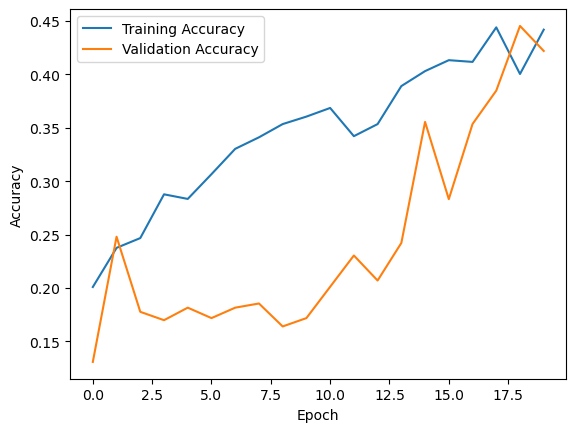

In [79]:

plt.plot(historyResnet.history['accuracy'], label='Training Accuracy')
plt.plot(historyResnet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Confusion Matrix**

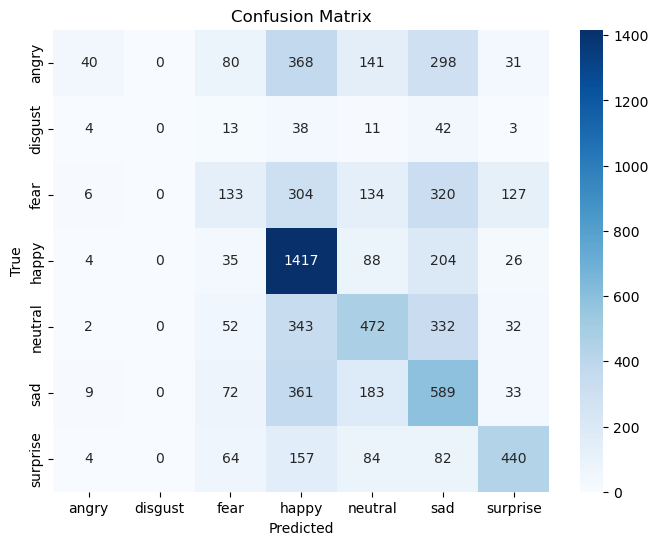

In [80]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Classification Report**

In [81]:
class_report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

       angry       0.58      0.04      0.08       958
     disgust       0.00      0.00      0.00       111
        fear       0.30      0.13      0.18      1024
       happy       0.47      0.80      0.60      1774
     neutral       0.42      0.38      0.40      1233
         sad       0.32      0.47      0.38      1247
    surprise       0.64      0.53      0.58       831

    accuracy                           0.43      7178
   macro avg       0.39      0.34      0.32      7178
weighted avg       0.44      0.43      0.38      7178



C:\Users\kalil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kalil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kalil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **ROC Curves**

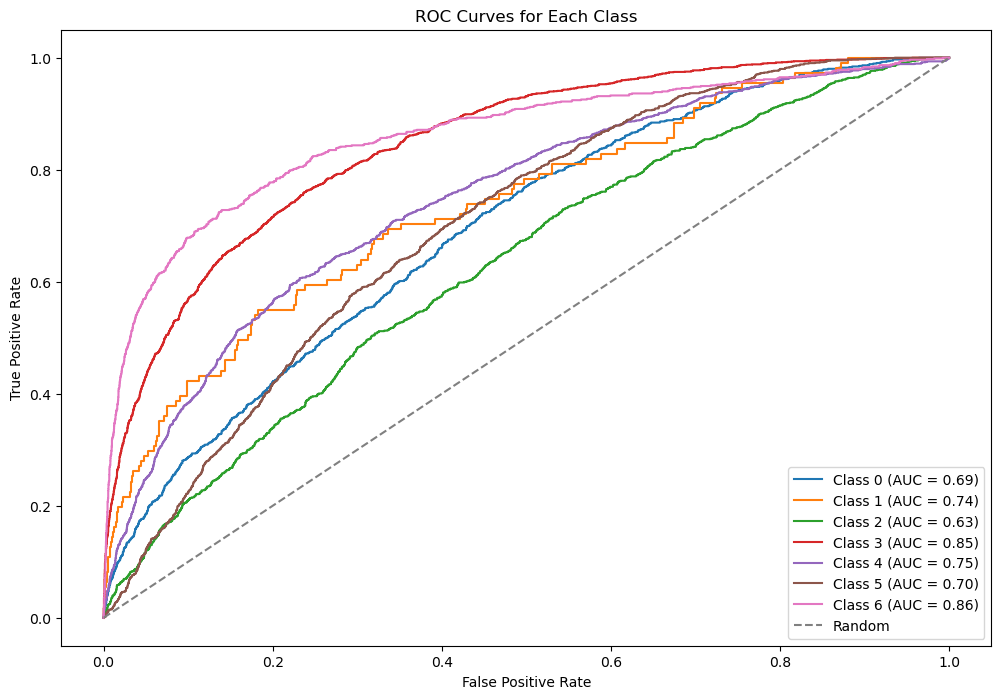

In [82]:
plt.figure(figsize=(12, 8))
for i in range(len(train_generator.class_indices)):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()

# **----------------------------------------------------------------------------------------------**

# **----------------------------------------------------------------------------------------------**

# **Create Endpoints For Live CAM**

In [ ]:

def predict_emotion(model_path, img_path, confidence_threshold=0.5):
    # Load the saved model
    if not os.path.isfile(model_path):
        print(f"Error: Model file '{model_path}' not found.")
        return None

    loaded_model = load_model(model_path)

    # Load and preprocess the input image
    if not os.path.isfile(img_path):
        print(f"Error: Image file '{img_path}' not found.")
        return None

    input_size = 48  # Adjust based on your model's input size

    # Load the image in color (RGB)
    img_color = cv2.imread(img_path)
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    # Resize the image to the model's input size
    img_gray = cv2.resize(img_gray, (input_size, input_size))
    # Expand dimensions to match the expected input shape
    img_array = np.expand_dims(img_gray, axis=-1)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize pixel values

    # Make predictions
    predictions = loaded_model.predict(img_array)

    # Interpret the predictions
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion_index = np.argmax(predictions)
    predicted_emotion = emotion_labels[predicted_emotion_index]
    confidence=predictions[0][predicted_emotion_index]
    
    # Check if the prediction confidence is above the threshold
    if confidence >= confidence_threshold:
        print(f"Predicted Emotion: {predicted_emotion} with confidence: {confidence:.2%}")
    else:
        print(f"Prediction confidence below threshold ({confidence_threshold:.2%}). Prediction result may not be reliable.")

    return predicted_emotion,confidence



def mainInstructions(image_path,model_path):
    # Open the default camera (index 0)
    camera = cv2.VideoCapture(0)

    # Check if the camera is opened successfully
    if not camera.isOpened():
        print("Failed to open the camera")
        exit()
    # Capture a frame from the camera
    text = "When your face is detected, click \"SPACE\" to save or \"ESC\" to cancel!"  # The text to be written
    while True:
        ret, frame = camera.read()
        
        # Convert the frame to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            # Draw a rectangle around the detected face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Here, you would implement liveness verification using a deep learning model
        # For example, you could use a pre-trained Convolutional Neural Network (CNN)
        # trained on real and fake face images to distinguish between the two.

        # Replace this placeholder with your liveness verification code.
        # You might need to use libraries like TensorFlow or PyTorch for the CNN.
        
        # Write info on live image
        
        font = cv2.FONT_HERSHEY_COMPLEX  # Font type
        font_scale = 0.5  # Font scale
        thickness = 1  # Thickness of the text
        color = (0, 255, 0)  # Text color in BGR format (Red in this case)
        text_color_bg=(0, 0, 0)
        # Get the dimensions of the image
        image_height, image_width, _ = frame.shape

        # Calculate the width and height of the text box
        text_box_width, text_box_height = cv2.getTextSize(text, font, font_scale, thickness)[0]

        # Calculate the position to align the text horizontally in the middle
        text_x = (image_width - text_box_width) // 2
        position =(text_x, 40)  # Position of the text (top-left corner)
        x, y = position
        cv2.rectangle(frame, (text_x-40, 15), (x + text_box_width+40, y + text_box_height), text_color_bg, -1)
        # Write the text on the image
        cv2.putText(frame, text, position, font, font_scale, color, thickness)


        cv2.imshow("My Emotion", frame)
        cv2.setWindowProperty("My Emotion", cv2.WND_PROP_TOPMOST, 1)
        
        # Save the captured frame as an image file
        cv2.imwrite(image_path, frame)

        predicted_emotion,confidence = predict_emotion(model_path, image_path,0.8)
        if(confidence>0.6):
            text = f"Predicted Emotion: {predicted_emotion} with confidence: {confidence:.2%}"
        else:
            text= "Not Sure!"
        
        key = cv2.waitKey(1)
        if key == ord(' '):
            

            
            # Check if the frame is captured successfully
            if not ret:
                print("Failed to capture the frame")
                exit()
            
        # 27 = ECHAP UNICODE
        if key == 27:
            # Close the window
            cv2.destroyAllWindows()
            # Release the camera and close the window
            camera.release()
            return "Operation Canceled!"





# Create a Flask application instance
app = Flask(__name__)



# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


#path of the image that will be saved and entred as input to the model to detect the emotion
imagePath=r"C:\Users\kalil\OneDrive\Bureau\flash\tryEmotion\compare.jpg"



@app.route('/MyEmotion/Custom', methods=['GET'])
def faceCustom():
    mainInstructions(imagePath,r"C:\Users\kalil\OneDrive\Bureau\FER13\Models\emotion_model_Custom.h5")

@app.route('/MyEmotion/GoogleNet', methods=['GET'])
def faceGoogleNet():
    mainInstructions(imagePath,r"C:\Users\kalil\OneDrive\Bureau\FER13\Models\emotion_model_Googlenet.h5")

@app.route('/MyEmotion/Resnet', methods=['GET'])
def faceResnet():
    mainInstructions(imagePath,r"C:\Users\kalil\OneDrive\Bureau\FER13\Models\emotion_model_resnet.h5")

@app.route('/MyEmotion/VGG16', methods=['GET'])
def faceVGG16():
    mainInstructions(imagePath,r"C:\Users\kalil\OneDrive\Bureau\FER13\Models\emotion_modelVGG16.h5")




# Run the application if the script is executed directly
if __name__ == '__main__':
    app.run(port=5000)






 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [24/Nov/2023 19:13:00] "GET //myemotion/custom HTTP/1.1" 404 -


1/1 [==============================] - 0s 98ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 95ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 92ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 95ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 94ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 90ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 92ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [======================

[2023-11-24 19:13:49,941] ERROR in app: Exception on /MyEmotion/Custom [GET]
Traceback (most recent call last):
  File "C:\Users\kalil\anaconda3\lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\kalil\anaconda3\lib\site-packages\flask\app.py", line 1487, in full_dispatch_request
    return self.finalize_request(rv)
  File "C:\Users\kalil\anaconda3\lib\site-packages\flask\app.py", line 1506, in finalize_request
    response = self.make_response(rv)
  File "C:\Users\kalil\anaconda3\lib\site-packages\flask\app.py", line 1801, in make_response
    raise TypeError(
TypeError: The view function for 'faceCustom' did not return a valid response. The function either returned None or ended without a return statement.
127.0.0.1 - - [24/Nov/2023 19:13:49] "GET //myemotion/Custom HTTP/1.1" 500 -


1/1 [==============================] - 0s 124ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 114ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 115ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 112ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 115ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 111ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 115ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [===============

[2023-11-24 19:14:23,800] ERROR in app: Exception on /MyEmotion/GoogleNet [GET]
Traceback (most recent call last):
  File "C:\Users\kalil\anaconda3\lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\kalil\anaconda3\lib\site-packages\flask\app.py", line 1487, in full_dispatch_request
    return self.finalize_request(rv)
  File "C:\Users\kalil\anaconda3\lib\site-packages\flask\app.py", line 1506, in finalize_request
    response = self.make_response(rv)
  File "C:\Users\kalil\anaconda3\lib\site-packages\flask\app.py", line 1801, in make_response
    raise TypeError(
TypeError: The view function for 'faceGoogleNet' did not return a valid response. The function either returned None or ended without a return statement.
127.0.0.1 - - [24/Nov/2023 19:14:23] "GET //myemotion/GoogleNet HTTP/1.1" 500 -


1/1 [==============================] - 0s 111ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 119ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 114ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 96ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 98ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 111ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 99ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==================

[2023-11-24 19:15:30,626] ERROR in app: Exception on /MyEmotion/Resnet [GET]
Traceback (most recent call last):
  File "C:\Users\kalil\anaconda3\lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\kalil\anaconda3\lib\site-packages\flask\app.py", line 1487, in full_dispatch_request
    return self.finalize_request(rv)
  File "C:\Users\kalil\anaconda3\lib\site-packages\flask\app.py", line 1506, in finalize_request
    response = self.make_response(rv)
  File "C:\Users\kalil\anaconda3\lib\site-packages\flask\app.py", line 1801, in make_response
    raise TypeError(
TypeError: The view function for 'faceResnet' did not return a valid response. The function either returned None or ended without a return statement.
127.0.0.1 - - [24/Nov/2023 19:15:30] "GET //myemotion/Resnet HTTP/1.1" 500 -


1/1 [==============================] - 0s 144ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 121ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 120ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 120ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 120ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 120ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [==============================] - 0s 118ms/step
Prediction confidence below threshold (80.00%). Prediction result may not be reliable.
1/1 [===============

[2023-11-24 19:16:11,751] ERROR in app: Exception on /MyEmotion/VGG16 [GET]
Traceback (most recent call last):
  File "C:\Users\kalil\anaconda3\lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\kalil\anaconda3\lib\site-packages\flask\app.py", line 1487, in full_dispatch_request
    return self.finalize_request(rv)
  File "C:\Users\kalil\anaconda3\lib\site-packages\flask\app.py", line 1506, in finalize_request
    response = self.make_response(rv)
  File "C:\Users\kalil\anaconda3\lib\site-packages\flask\app.py", line 1801, in make_response
    raise TypeError(
TypeError: The view function for 'faceVGG16' did not return a valid response. The function either returned None or ended without a return statement.
127.0.0.1 - - [24/Nov/2023 19:16:11] "GET //myemotion/VGG16 HTTP/1.1" 500 -
